<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [152]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [ ]:
#Катя Черницына  @CharryKate  

# Первая часть. Исследование.

In [153]:
import pandas as pd
from catboost import CatBoostClassifier
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [154]:
data_orig = pd.read_csv('./train.csv')
data_orig.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [155]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

cols = num_cols + cat_cols + [target_col]
data = data_orig[cols]

In [156]:
#случайные строчки
rand = np.random.randint(0, data.shape[0], 20)
rand_rows=pd.DataFrame([data.iloc[i] for i in rand], index=rand)
rand_rows.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3006,20,94.55,1899.65,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
73,60,74.85,4456.35,Female,1,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),0
5170,7,20.65,134.05,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
234,66,19.70,1253.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4499,1,81.70,81.7,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [157]:
#Распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

In [158]:
#информация о датасете
print(data.shape)
data.info()
data.describe()

(5282, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 1

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [159]:
# Посмотрим на пропущенные значения
isNan = pd.DataFrame(data.isna().sum())
isNan

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [160]:
data[num_cols[2]] = pd.to_numeric(data[num_cols[2]], errors='coerce')
data.TotalSpent.fillna(0, inplace=True)

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'TotalSpent'}>,
        <AxesSubplot:title={'center':'Churn'}>]], dtype=object)

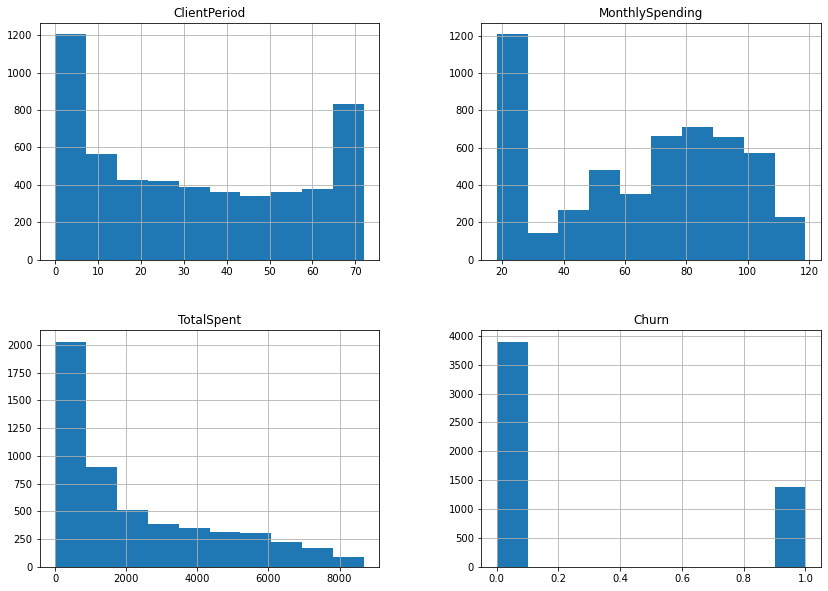

In [161]:
data.hist(column=num_cols+[target_col], figsize=(14, 10))

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

[array([2627, 2655], dtype=int64), array([4440,  842], dtype=int64), array([2705, 2577], dtype=int64), array([3676, 1606], dtype=int64), array([ 521, 4761], dtype=int64), array([2511,  521, 2250], dtype=int64), array([1800, 2341, 1141], dtype=int64), array([2612, 1141, 1529], dtype=int64), array([2332, 1141, 1809], dtype=int64), array([2317, 1141, 1824], dtype=int64), array([2604, 1141, 1537], dtype=int64), array([2099, 1141, 2042], dtype=int64), array([2081, 1141, 2060], dtype=int64), array([2920, 1082, 1280], dtype=int64), array([2134, 3148], dtype=int64), array([1159, 1143, 1786, 1194], dtype=int64)]


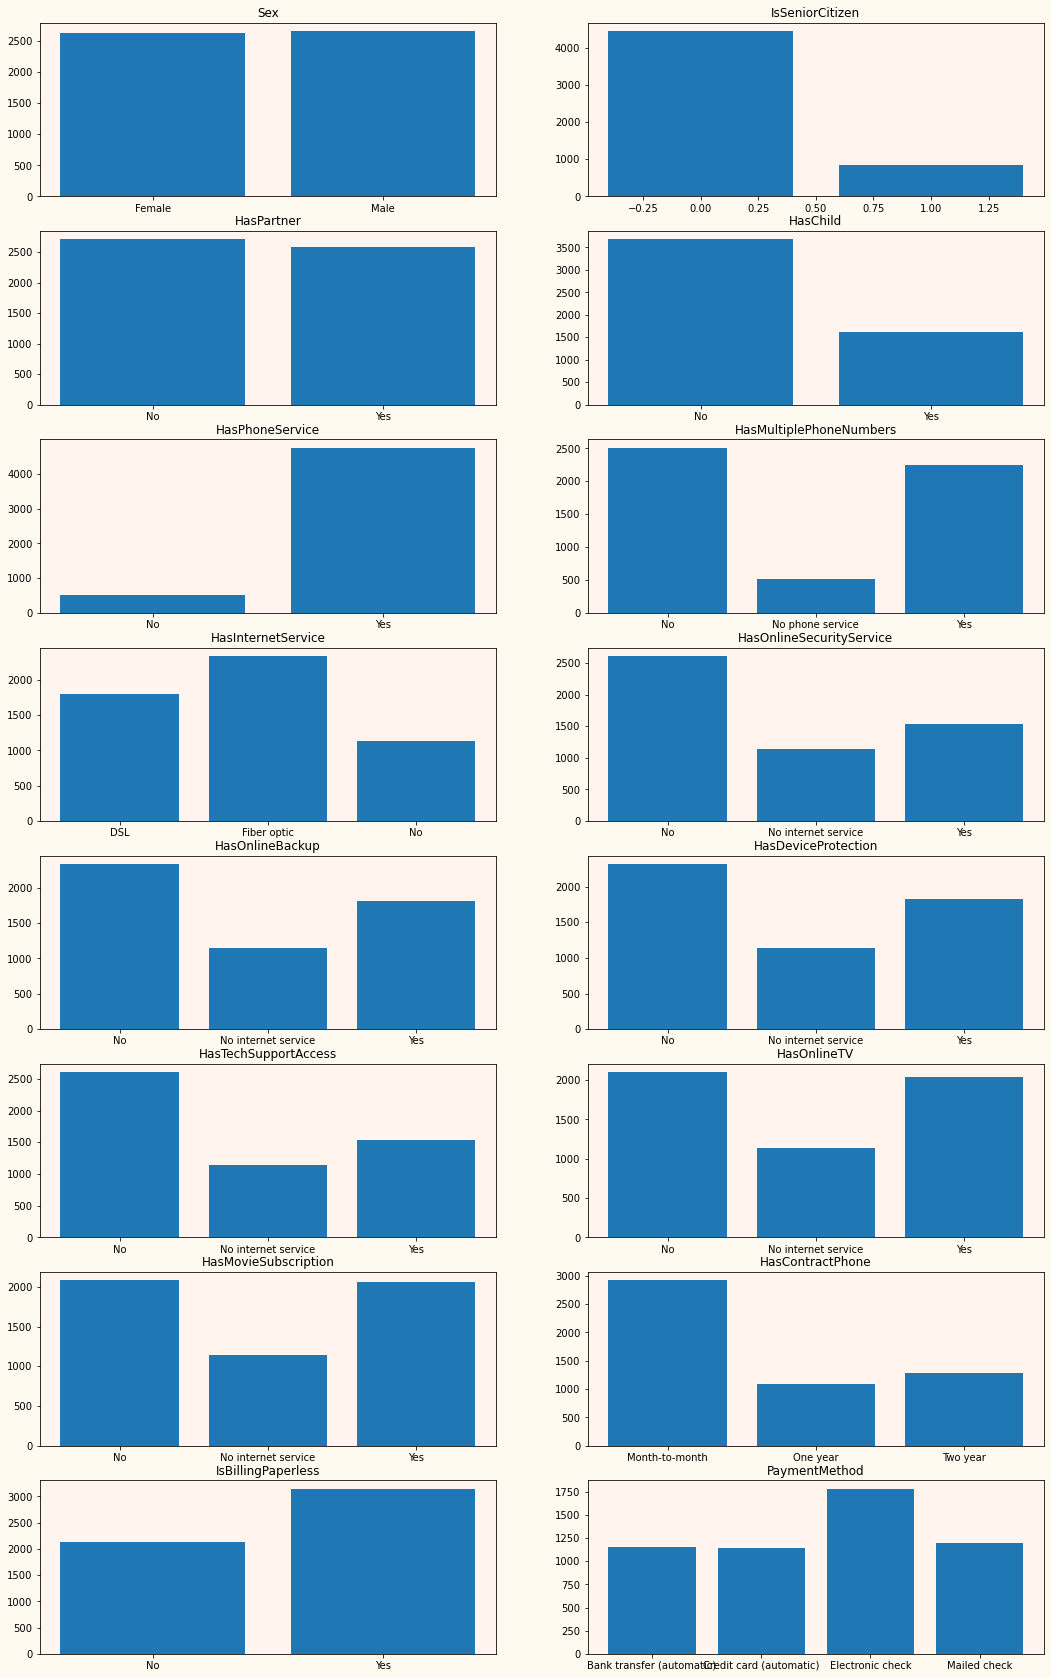

In [162]:
x = []
y = []
for i in range(16):
    res = np.array(data[cat_cols[i]].values) 
    unique_res = np.unique(res, return_counts = True) 
    x.append(unique_res[0])
    y.append(unique_res[1])
print(y)
fig, axes = plt.subplots(8, 2)
for i in range(8):
    for j in range (2):
        axes[i][j].set_title(cat_cols[2*i+j])
        axes[i][j].bar(x[2*i+j], y[2*i+j])
        axes[i][j].set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(18)  
fig.set_figheight(30) 

plt.show()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [163]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [164]:
data = pd.get_dummies(data, columns=cat_cols)

In [165]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

In [166]:
pca = StandardScaler() 
X = pca.fit(data[num_cols+cat_cols].values)
X = pca.transform(data[num_cols + cat_cols])

In [167]:
X_train, X_valid, y_train, y_valid = train_test_split(X, data[target_col], test_size=0.2)

In [168]:
lr = LogisticRegressionCV(scoring='roc_auc', refit=True)
lr.fit(X_train, y_train)
y_train_predicted = lr.predict_proba(X_train)[:, 1]
y_valid_predicted = lr.predict_proba(X_valid)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
valid_auc = roc_auc_score(y_valid, y_valid_predicted)

print ('Max auc_roc:', lr.scores_[1].max(), lr.C_)
print ("train_auc = ", train_auc, "valid_auc = ", valid_auc)

Max auc_roc: 0.8747670250896058 [10000.]
train_auc =  0.8444668164886742 valid_auc =  0.8646661039477641


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [195]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]
X_train = data_orig.iloc[:, :-1]
y_train = pd.DataFrame(data_orig['Churn'])
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [196]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_train, y_train, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [197]:
model = boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', silent=True)
grid = {'n_estimators': [1000, 1200, 1700, 2000, 2500],
    'learning_rate': np.linspace(0.01, 0.04, 10),
        'depth': [2, 3, 4, 5]}

In [199]:
grid_search_result = model.grid_search(grid,  X=X_train_cat, y=y_train_cat, plot=False)


bestTest = 0.8405401714
bestIteration = 999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8405402	best: 0.8405402 (0)	total: 3.44s	remaining: 11m 25s

bestTest = 0.8402957499
bestIteration = 985

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8402957	best: 0.8405402 (0)	total: 6.64s	remaining: 10m 57s

bestTest = 0.8409715033
bestIteration = 996

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8409715	best: 0.8409715 (2)	total: 9.97s	remaining: 10m 54s

bestTest = 0.8419779446
bestIteration = 970

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8419779	best: 0.8419779 (3)	total: 13.2s	remaining: 10m 


bestTest = 0.8436385726
bestIteration = 1361

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8436386	best: 0.8444940 (14)	total: 2m 39s	remaining: 13m

bestTest = 0.8444940476
bestIteration = 1149

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8444940	best: 0.8444940 (14)	total: 2m 46s	remaining: 13m 5s

bestTest = 0.8440842823
bestIteration = 982

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8440843	best: 0.8444940 (14)	total: 2m 54s	remaining: 13m 13s

bestTest = 0.8431533241
bestIteration = 1293

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8431533	best: 0.8444940 (14)	total: 3m 1s	remain


bestTest = 0.8412087359
bestIteration = 704

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8412087	best: 0.8444940 (14)	total: 6m 39s	remaining: 13m 13s

bestTest = 0.8424272487
bestIteration = 582

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8424272	best: 0.8444940 (14)	total: 6m 47s	remaining: 13m 10s

bestTest = 0.8426716701
bestIteration = 836

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8426717	best: 0.8444940 (14)	total: 6m 54s	remaining: 13m 7s

bestTest = 0.8428010697
bestIteration = 1032

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8428011	best: 0.8444940 (14)	total: 7m 2s	rema


bestTest = 0.8428010697
bestIteration = 1032

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8428011	best: 0.8444940 (14)	total: 13m 3s	remaining: 13m 3s

bestTest = 0.8407127042
bestIteration = 947

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
100:	loss: 0.8407127	best: 0.8444940 (14)	total: 13m 11s	remaining: 12m 55s

bestTest = 0.8417191454
bestIteration = 969

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
101:	loss: 0.8417191	best: 0.8444940 (14)	total: 13m 19s	remaining: 12m 48s

bestTest = 0.8423661433
bestIteration = 986

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8423661	best: 0.8444940 (14)	total: 13m 2


bestTest = 0.8436781113
bestIteration = 1341

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
131:	loss: 0.8436781	best: 0.8448930 (105)	total: 18m 57s	remaining: 9m 45s

bestTest = 0.8426501035
bestIteration = 1177

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
132:	loss: 0.8426501	best: 0.8448930 (105)	total: 19m 13s	remaining: 9m 41s

bestTest = 0.8422547159
bestIteration = 864

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
133:	loss: 0.8422547	best: 0.8448930 (105)	total: 19m 29s	remaining: 9m 36s

bestTest = 0.8421001553
bestIteration = 1108

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
134:	loss: 0.8421002	best: 0.8448930 (105)	total:


bestTest = 0.8417443064
bestIteration = 827

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
164:	loss: 0.8417443	best: 0.8448930 (105)	total: 27m 35s	remaining: 5m 51s

bestTest = 0.8422151771
bestIteration = 607

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
165:	loss: 0.8422152	best: 0.8448930 (105)	total: 27m 50s	remaining: 5m 42s

bestTest = 0.8426716701
bestIteration = 559

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
166:	loss: 0.8426717	best: 0.8448930 (105)	total: 28m 4s	remaining: 5m 32s

bestTest = 0.8419420002
bestIteration = 587

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
167:	loss: 0.8419420	best: 0.8448930 (105)	total: 28m


bestTest = 0.8419420002
bestIteration = 587

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
197:	loss: 0.8419420	best: 0.8448930 (105)	total: 39m 29s	remaining: 23.9s

bestTest = 0.8422690936
bestIteration = 413

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
198:	loss: 0.8422691	best: 0.8448930 (105)	total: 39m 57s	remaining: 12s

bestTest = 0.8422906602
bestIteration = 482

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
199:	loss: 0.8422907	best: 0.8448930 (105)	total: 40m 26s	remaining: 0us
Estimating final quality...


In [200]:
grid_search_result.values()




dict_values([{'depth': 4, 'iterations': 1000, 'learning_rate': 0.026666666666666665}, defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 

In [201]:
boosting_model = catboost.CatBoostClassifier(n_estimators=1000, 
                                             cat_features=cat_cols,
                                             eval_metric='AUC',
                                             silent=True,
                                             learning_rate=0.026,
                                             depth=4)

In [203]:
boosting_model.fit(X_train_cat, y_train_cat)



In [204]:
y_train_predicted = boosting_model.predict_proba(X_train_cat)
y_test_predicted = boosting_model.predict_proba(X_test_cat)
train_auc = roc_auc_score(y_train_cat.values, y_train_predicted[:, 1])
test_auc = roc_auc_score(y_test_cat.values, y_test_predicted[:, 1])



In [205]:
print('Train roc_auc:', train_auc, end='\n\n')
print('Test roc_auc:', test_auc)
boosting_model = catboost.CatBoostClassifier( silent = True,
                                             cat_features=cat_cols,
                                             depth=2)



Train roc_auc: 0.8827174576633792

Test roc_auc: 0.8256896408418837


In [206]:
boosting_model.fit(X_train_cat, y_train_cat)


In [207]:

y_train_predicted = boosting_model.predict_proba(X_train_cat)
y_test_predicted = boosting_model.predict_proba(X_test_cat)
train_auc = roc_auc_score(y_train_cat.values, y_train_predicted[:, 1])
test_auc = roc_auc_score(y_test_cat.values, y_test_predicted[:, 1])


In [208]:

print('Train roc_auc:', train_auc, end='\n\n')
print('Test roc_auc:', test_auc)

Train roc_auc: 0.8633338396701776

Test roc_auc: 0.8296838780580158


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [209]:
best_model = boosting_model

In [211]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.